In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("/content/MentalHealthMusicRec.csv")

df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [8]:
df.isnull().sum()

,0
Timestamp,0
Age,1
Primary streaming service,1
Hours per day,0
While working,3
Instrumentalist,4
Composer,1
Fav genre,0
Exploratory,0
Foreign languages,4


In [9]:
df.nunique()

,0
Timestamp,735
Age,61
Primary streaming service,6
Hours per day,27
While working,2
Instrumentalist,2
Composer,2
Fav genre,16
Exploratory,2
Foreign languages,2


In [10]:
# Drop irrelevant or unhelpful columns
df.drop(columns=['Timestamp', 'Permissions'], inplace=True)

In [11]:
# Strip and standardize text columns
df = df.applymap(lambda x: x.strip().capitalize() if isinstance(x, str) else x)

In [12]:
# Fill missing categorical data with mode (most common value)
fill_mode_cols = ['While working', 'Instrumentalist', 'Composer', 'Foreign languages', 'Music effects']
for col in fill_mode_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
# Fill BPM (numerical) with median
df['BPM'].fillna(df['BPM'].median(), inplace=True)

In [14]:
# Drop rows with missing Age or Streaming Service
df.dropna(subset=['Age', 'Primary streaming service'], inplace=True)

In [15]:
# Convert 'Yes'/'No' type columns to binary 1/0
binary_cols = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

In [16]:
# Rename OCD to match lowercase naming
df.rename(columns={'OCD': 'Ocd'}, inplace=True)

In [17]:
# Define function to bucket severity
def severity_bucket(x):
    if x == 0:
        return 'None'
    elif 1 <= x <= 3:
        return 'Mild'
    elif 4 <= x <= 6:
        return 'Moderate'
    elif 7 <= x <= 10:
        return 'Severe'
    else:
        return 'Unknown'

# Apply for each mental health condition
for condition in ['Anxiety', 'Depression', 'Insomnia', 'Ocd']:
    df[condition + '_level'] = df[condition].apply(severity_bucket)

# Quick check
df[['Anxiety', 'Anxiety_level', 'Depression', 'Depression_level']].head()


,Anxiety,Anxiety_level,Depression,Depression_level
0,3.0,Mild,0.0,None
1,7.0,Severe,2.0,Mild
2,7.0,Severe,7.0,Severe
3,9.0,Severe,7.0,Severe
4,7.0,Severe,2.0,Mild


# **Analyze & Visualize Genre Preferences by Severity Levels**

In [18]:
# Mapping dictionary
freq_map = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Very frequently': 3
}

# List of frequency columns (genres)
genre_cols = [col for col in df.columns if col.startswith('Frequency')]

# Map frequency categories to numbers
for col in genre_cols:
    df[col] = df[col].map(freq_map)

# Check conversion
df[genre_cols].head()

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,1,0,1,0,0,2,0,3,3,1,0,3,2,3,0,2
1,2,0,0,1,2,1,3,1,2,1,0,2,2,1,3,1
2,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3
3,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0
4,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1


**1. Anxiety**

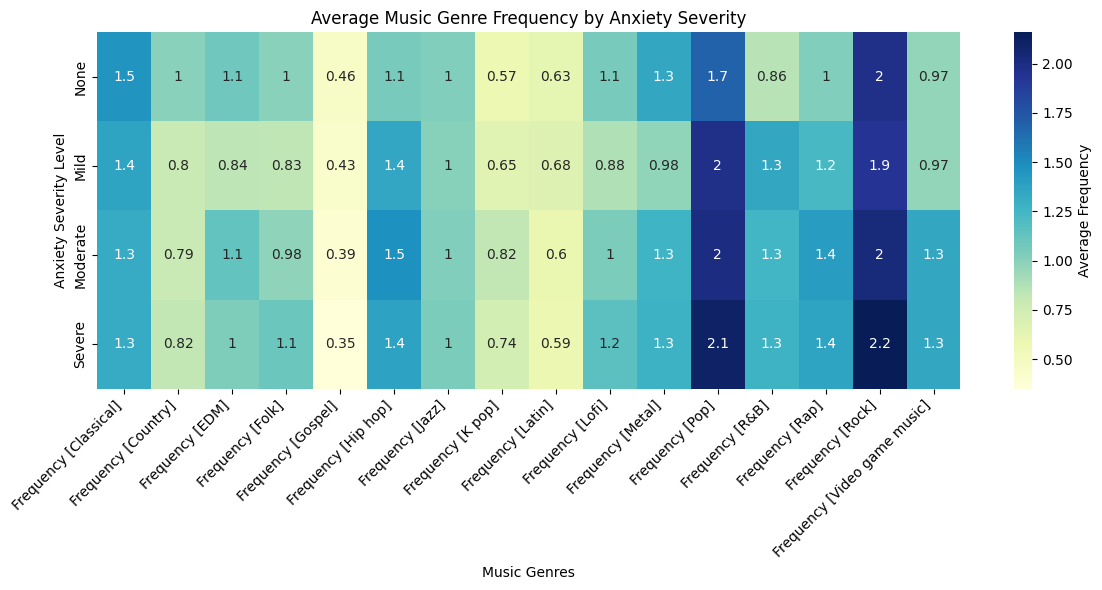

In [19]:
# Group by Anxiety severity level and calculate mean frequencies
anxiety_group = df.groupby('Anxiety_level')[genre_cols].mean().reindex(['None', 'Mild', 'Moderate', 'Severe'])

# Plotting a heatmap to visualize genre preferences across anxiety severity
plt.figure(figsize=(12, 6))
sns.heatmap(anxiety_group, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Average Frequency'})
plt.title('Average Music Genre Frequency by Anxiety Severity')
plt.ylabel('Anxiety Severity Level')
plt.xlabel('Music Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**2.Depression**

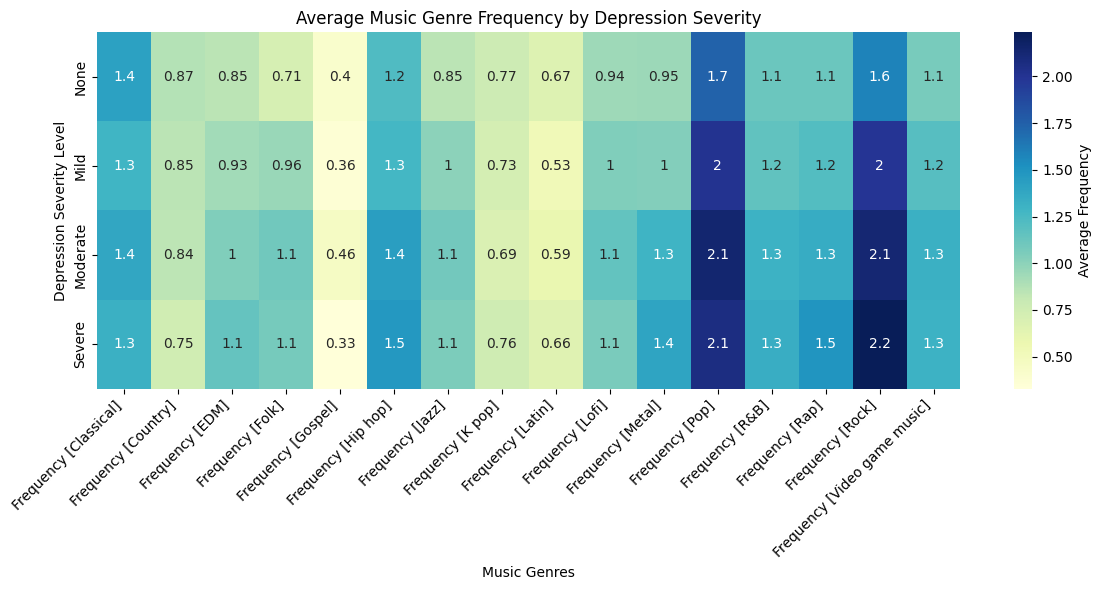

In [20]:
# Group by Depression severity level and calculate mean frequencies
depression_group = df.groupby('Depression_level')[genre_cols].mean().reindex(['None', 'Mild', 'Moderate', 'Severe'])

# Plotting a heatmap to visualize genre preferences across anxiety severity
plt.figure(figsize=(12, 6))
sns.heatmap(depression_group, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Average Frequency'})
plt.title('Average Music Genre Frequency by Depression Severity')
plt.ylabel('Depression Severity Level')
plt.xlabel('Music Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3.Insomnia**

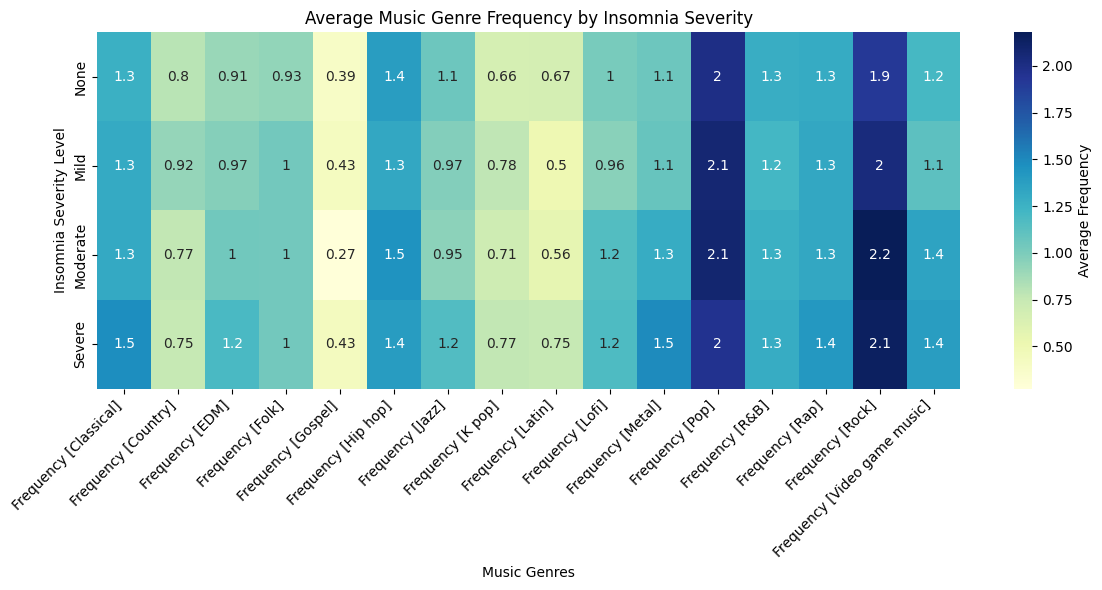

In [21]:
# Group by Insomnia severity level and calculate mean frequencies
insomnia_group = df.groupby('Insomnia_level')[genre_cols].mean().reindex(['None', 'Mild', 'Moderate', 'Severe'])

# Plotting a heatmap to visualize genre preferences across Insomnia severity
plt.figure(figsize=(12, 6))
sns.heatmap(insomnia_group, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Average Frequency'})
plt.title('Average Music Genre Frequency by Insomnia Severity')
plt.ylabel('Insomnia Severity Level')
plt.xlabel('Music Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**4.OCD**

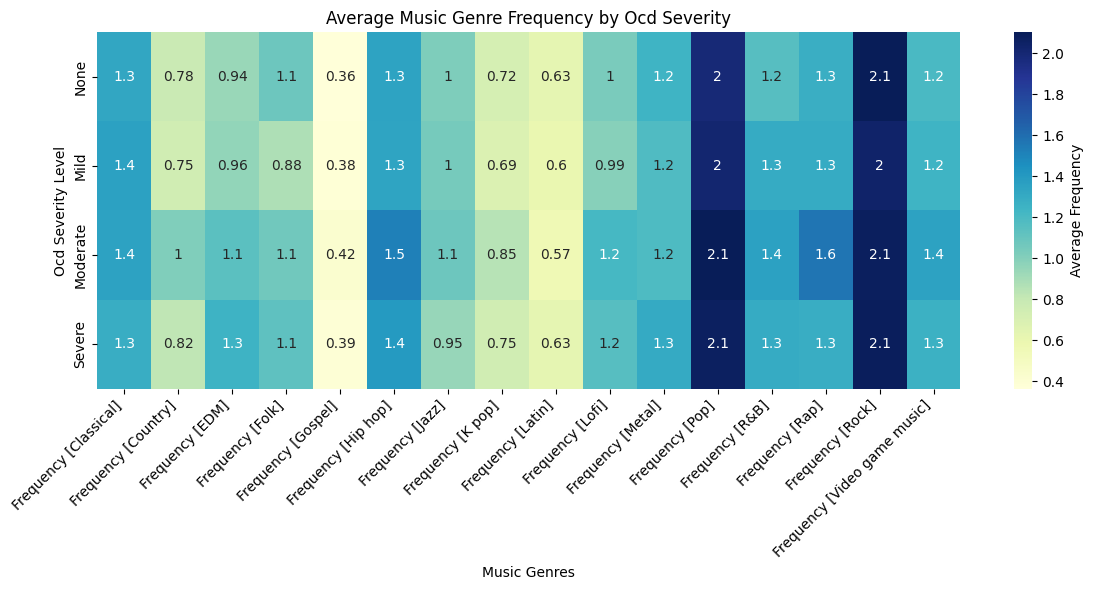

In [22]:
# Group by Ocd severity level and calculate mean frequencies
ocd_group = df.groupby('Ocd_level')[genre_cols].mean().reindex(['None', 'Mild', 'Moderate', 'Severe'])

# Plotting a heatmap to visualize genre preferences across Ocd severity
plt.figure(figsize=(12, 6))
sns.heatmap(ocd_group, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Average Frequency'})
plt.title('Average Music Genre Frequency by Ocd Severity')
plt.ylabel('Ocd Severity Level')
plt.xlabel('Music Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
df.to_csv("MentaLHealthMusicRecCleaned.csv", index=False)

print("✅ Cleaned dataset saved as 'MentaLHealthMusicRecCleaned.csv'")

✅ Cleaned dataset saved as 'MentaLHealthMusicRecCleaned.csv'
